In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('height-weight (1).csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [3]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [4]:
df.duplicated().sum()

1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [6]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [7]:
# divide the dataset into independent and dependet feature
X = df[['Weight']]
y = df[['Height']]
X.shape,y.shape

((23, 1), (23, 1))

In [8]:
# convert the dataset into test data and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = .20,random_state = 42)


In [9]:
x_train.shape,x_test.shape

((18, 1), (5, 1))

In [10]:
y_train.shape,y_test.shape

((18, 1), (5, 1))

In [11]:
# Standardization of dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
scaler

StandardScaler()

In [13]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_test

array([[ 0.34927086],
       [ 0.34927086],
       [-1.63795991],
       [ 1.37299581],
       [-0.43357762]])

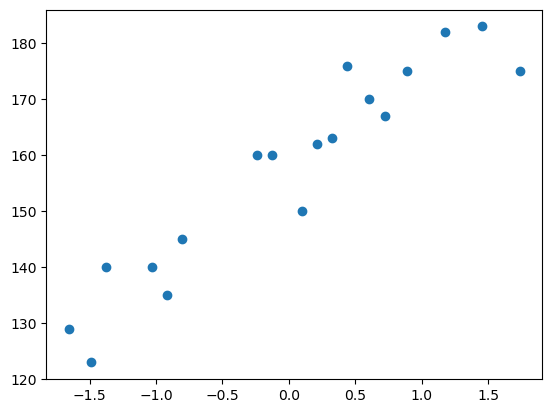

In [14]:
plt.scatter(x_train,y_train)

In [15]:
scaler.transform([[80]])

C:\Users\mohit bhade\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.46970909]])

In [16]:
# Model Training
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor

LinearRegression()

In [17]:
# TRAINING WITH THE TRAINING DATA
regressor.fit(x_train,y_train)
regressor.intercept_ # intercept of the best fit line 


array([157.5])

In [18]:
regressor.coef_ #slope of hte data point

array([[17.03440872]])

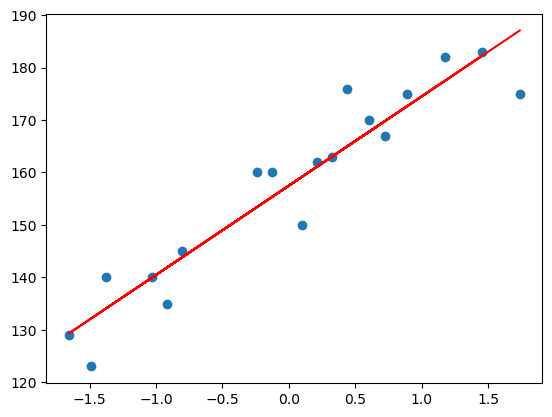

In [19]:
# PLOTTING BEST FIT LINE
plt.scatter(x_train,y_train)
plt.plot(x_train,regressor.predict(x_train),'r')

In [20]:
#PREDICTION FOR TEST DATA
y_pred_test = regressor.predict(x_test)
y_pred_test
y_test

,Height
15,177
9,170
0,120
8,182
17,159


In [21]:
y_pred_test

array([[163.44962265],
       [163.44962265],
       [129.59832137],
       [180.88817179],
       [150.11426154]])

In [22]:
# performance metrics MSE,MAE,RMSE
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print(mse,' ',mae,' ',rmse)

79.76809057832979   7.9393285483063725   8.931298370244372


In [23]:
# Accuracy of the model
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test) # r^2 
ar2 = 1- (1-score)*(len(y_test) - x_test.shape[1] -1)


In [24]:
score,ar2

(0.8379487839705635, 0.5138463519116905)